# Exploring the Parkinson's Electrophysiological Signal Dataset (PESD)

*This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Please be cautious when interpreting the code or results.*

## Introduction

The Parkinson's Electrophysiological Signal Dataset (PESD) contains electrophysiological signals from simulated healthy subjects. Beta oscillations (13 to 30 Hz) in the subthalamic nucleus (STN) are typically used as pathological biomarkers for Parkinson's Disease (PD) symptoms. Each sample in this dataset includes two types of signals:

1. **Beta Average Rectified Voltage (ARV)**: These signals are in the frequency domain, determined by calculating the Average Rectified Value of the beta band.

2. **Local Field Potential (LFP)**: These signals are in the time domain, derived from the synchronized activity of neuron populations between the cortex, STN, and thalamus.

The dataset was generated from a cortico-basal-ganglia network from a Parkinsonian computational model originally presented by Fleming et al. in the article: 'Simulation of Closed-Loop Deep Brain Stimulation Control Schemes for Suppression of Pathological Beta Oscillations in Parkinson's Disease'.

**Note**: To run this notebook, you'll need the following packages installed:
- `dandi` (for accessing the data)
- `pynwb` (for working with NWB files)
- `lindi` (for accessing remote NWB files)
- `numpy` (for numerical operations)
- `matplotlib` (for visualization)
- `scipy` (for signal processing)
- `seaborn` (for enhanced visualizations)

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal
import pynwb
import lindi

# Set seaborn styling
sns.set_theme()

## Accessing the Dandiset

Let's start by using the DANDI API to list all assets in the dataset.

In [2]:
from dandi.dandiapi import DandiAPIClient
client = DandiAPIClient()
dandiset = client.get_dandiset("001333")
assets = list(dandiset.get_assets())

# Display basic information about the Dandiset
metadata = dandiset.get_metadata()
print(f"Dandiset name: {metadata.name}")
print(f"Description: {metadata.description[:300]}...")
print(f"Total number of assets: {len(assets)}")

Dandiset name: Parkinson's Electrophysiological Signal Dataset (PESD)
Description: The dataset contains electrophysiological signals from both healthy and parkinsonian subjects. We generated two types of samples from each group. The parkinsonian signals show a relatively high power density at the beta frequency (13 to 30 Hz). Thus, the beta oscillations (13 to 30 Hz) in the subtha...
Total number of assets: 52


## Understanding the Dataset Structure

Let's explore the types of files in this dataset to better understand its structure.

sub-healthy-simulated-data: 1 files
sub-healthy-simulated-beta: 10 files
sub-healthy-simulated-lfp: 10 files
sub-parkinson-simulated-beta: 12 files
sub-parkinson-simulated-lfp: 19 files


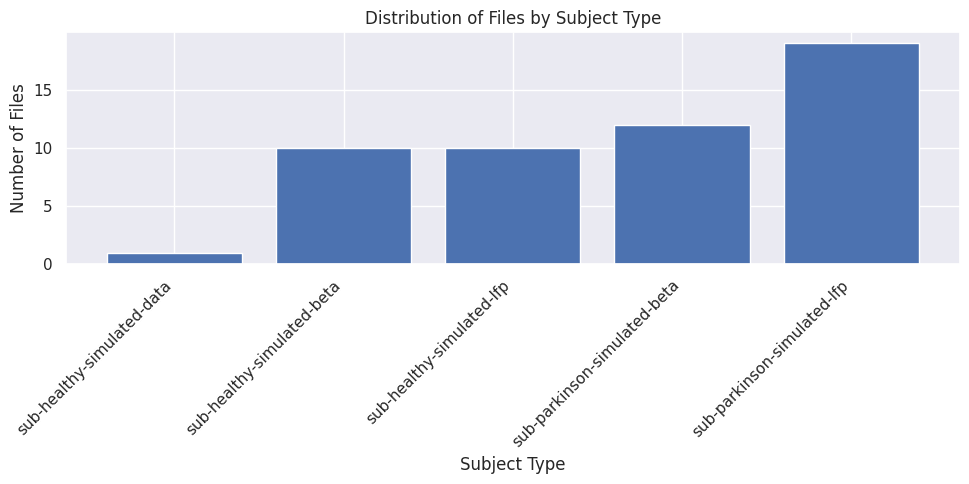

In [3]:
# Count the different subject types
subject_counts = {}
for asset in assets:
    path = asset.path
    subject = path.split('/')[0]
    if subject in subject_counts:
        subject_counts[subject] += 1
    else:
        subject_counts[subject] = 1

# Display counts by subject type
for subject, count in subject_counts.items():
    print(f"{subject}: {count} files")

# Plot the distribution of files by subject type
plt.figure(figsize=(10, 5))
plt.bar(subject_counts.keys(), subject_counts.values())
plt.xlabel('Subject Type')
plt.ylabel('Number of Files')
plt.title('Distribution of Files by Subject Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The dataset contains three types of simulated healthy subject data:

1. **sub-healthy-simulated-beta**: Contains Beta Band Voltage data (frequency domain)
2. **sub-healthy-simulated-lfp**: Contains Local Field Potential data (time domain)
3. **sub-healthy-simulated-data**: Contains a general data file

Let's examine one file from each type to understand the differences.

## Examining a Beta Band Voltage File

First, let's examine a file from the sub-healthy-simulated-beta category:

In [4]:
# Select a beta band file from the assets
beta_file = None
for asset in assets:
    if 'sub-healthy-simulated-beta' in asset.path:
        beta_file = asset
        break

beta_asset_id = beta_file.identifier
beta_file_url = f"https://api.dandiarchive.org/api/assets/{beta_asset_id}/download/"
print(f"Selected Beta Band file: {beta_file.path}")
print(f"Asset ID: {beta_asset_id}")

Selected Beta Band file: sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-218_ecephys.nwb
Asset ID: da77917e-655c-4eeb-a0a6-7529a8a35901


Now let's load this file and examine its structure:

In [5]:
# Load the beta band file using lindi
f = lindi.LindiH5pyFile.from_lindi_file(f"https://lindi.neurosift.org/dandi/dandisets/001333/assets/{beta_asset_id}/nwb.lindi.json")
beta_nwb = pynwb.NWBHDF5IO(file=f, mode='r').read()

# Display basic metadata
print(f"Session Description: {beta_nwb.session_description}")
print(f"Experiment Description: {beta_nwb.experiment_description[:150]}...")
print(f"Subject ID: {beta_nwb.subject.subject_id}")
print(f"Keywords: {beta_nwb.keywords}")

Session Description: Parkinson's Electrophysiological Signal Dataset (PESD) Generated from Simulation
Experiment Description: The PESD dataset is generated from a cortico-basal-ganglia network for a Parkinsonian computational model. The computational model of the cortico-basa...
Subject ID: healthy-simulated-beta
Keywords: <LindiH5pyDataset: /general/keywords>


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Now, let's examine the electrode information (channel locations):

In [6]:
# Get electrode information
electrodes = beta_nwb.ec_electrodes
electrode_ids = electrodes["id"].data[:]
locations = electrodes["location"].data[:]
labels = electrodes["label"].data[:]
groups = electrodes["group_name"].data[:]

# Display electrode information as a table
import pandas as pd
electrode_df = pd.DataFrame({
    'ID': electrode_ids,
    'Label': labels,
    'Location': locations,
    'Group': groups
})

print(f"Number of electrodes: {len(electrode_ids)}")
electrode_df

Number of electrodes: 12


,ID,Label,Location,Group
0,0,shank0_elec0,Simulated Cortico-basal-ganglia network of brain,shank0
1,1,shank0_elec1,Simulated Cortico-basal-ganglia network of brain,shank0
2,2,shank0_elec2,Simulated Cortico-basal-ganglia network of brain,shank0
3,3,shank1_elec0,Simulated Cortico-basal-ganglia network of brain,shank1
4,4,shank1_elec1,Simulated Cortico-basal-ganglia network of brain,shank1
5,5,shank1_elec2,Simulated Cortico-basal-ganglia network of brain,shank1
6,6,shank2_elec0,Simulated Cortico-basal-ganglia network of brain,shank2
7,7,shank2_elec1,Simulated Cortico-basal-ganglia network of brain,shank2
8,8,shank2_elec2,Simulated Cortico-basal-ganglia network of brain,shank2
9,9,shank3_elec0,Simulated Cortico-basal-ganglia network of brain,shank3


Let's explore the Beta Band Voltage data:

In [7]:
# Get the Beta Band Voltage data
ecephys = beta_nwb.processing["ecephys"]
beta_band = ecephys["LFP"]["Beta_Band_Voltage"]

# Print basic info about the Beta Band data
print(f"Data shape: {beta_band.data.shape}")
print(f"Electrode count: {beta_band.electrodes['id'].data[:].size}")

# Get the data and timestamps
beta_data = beta_band.data[:]
timestamps = beta_band.timestamps[:]

print(f"Data time range: {timestamps[0]} to {timestamps[-1]} seconds")
print(f"Data length: {len(beta_data)} samples")

# Calculate sampling frequency
fs = 1.0 / (timestamps[1] - timestamps[0]) 
print(f"Sampling frequency: {fs:.2f} Hz")

Data shape: (1400,)
Electrode count: 12


Data time range: 10.019979999862995 to 37.99998999944128 seconds
Data length: 1400 samples
Sampling frequency: 49.98 Hz


Let's visualize the Beta Band Voltage data:

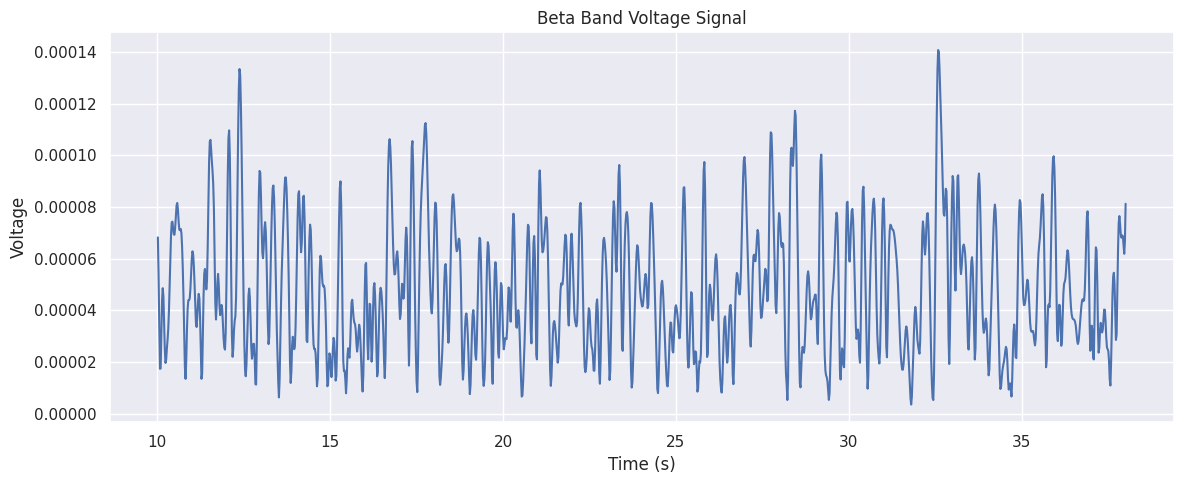

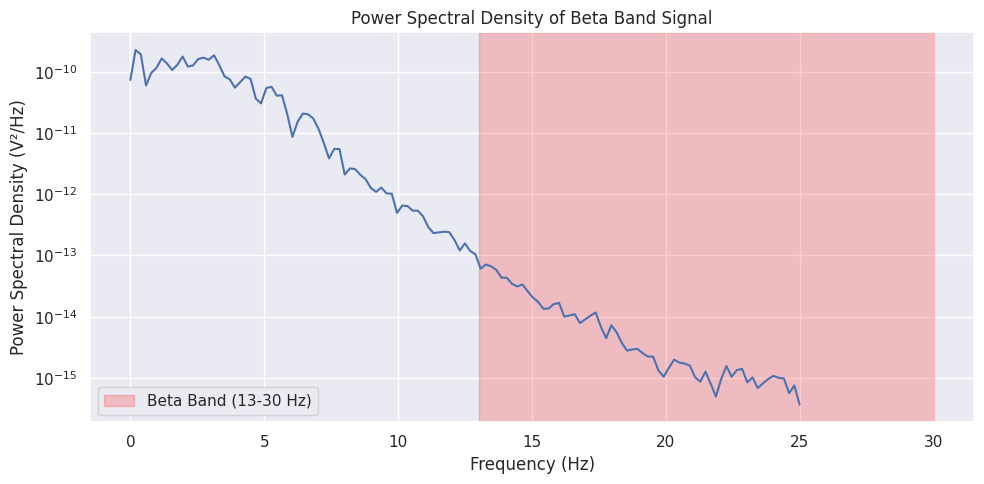

In [8]:
# Plot the beta band voltage data
plt.figure(figsize=(12, 5))
plt.plot(timestamps, beta_data)
plt.xlabel('Time (s)')
plt.ylabel('Voltage')
plt.title('Beta Band Voltage Signal')
plt.grid(True)
plt.tight_layout()
plt.show()

# Compute and plot power spectral density
f, Pxx = signal.welch(beta_data, fs, nperseg=256)

# Focus on the 0-40 Hz range for better visualization
mask = f <= 40
f = f[mask]
Pxx = Pxx[mask]

plt.figure(figsize=(10, 5))
plt.semilogy(f, Pxx)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (V²/Hz)')
plt.title('Power Spectral Density of Beta Band Signal')
plt.axvspan(13, 30, alpha=0.2, color='red', label='Beta Band (13-30 Hz)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Examining a Local Field Potential (LFP) File

Next, let's examine a file from the sub-healthy-simulated-lfp category:

In [9]:
# Select an LFP file from the assets
lfp_file = None
for asset in assets:
    if 'sub-healthy-simulated-lfp' in asset.path:
        lfp_file = asset
        break

lfp_asset_id = lfp_file.identifier
lfp_file_url = f"https://api.dandiarchive.org/api/assets/{lfp_asset_id}/download/"
print(f"Selected LFP file: {lfp_file.path}")
print(f"Asset ID: {lfp_asset_id}")

Selected LFP file: sub-healthy-simulated-lfp/sub-healthy-simulated-lfp_ses-162_ecephys.nwb
Asset ID: 00df5264-001b-4bb0-a987-0ddfb6058961


Now let's load this LFP file and examine its structure:

In [10]:
# Load the LFP file using lindi
f = lindi.LindiH5pyFile.from_lindi_file(f"https://lindi.neurosift.org/dandi/dandisets/001333/assets/{lfp_asset_id}/nwb.lindi.json")
lfp_nwb = pynwb.NWBHDF5IO(file=f, mode='r').read()

# Get the LFP data
ecephys = lfp_nwb.processing["ecephys"]
lfp_data = ecephys["LFP"]["LFP"]

# Print basic info about the LFP data
print(f"Data shape: {lfp_data.data.shape}")
print(f"Sampling rate: {lfp_data.rate} Hz")
print(f"Starting time: {lfp_data.starting_time} seconds")
print(f"Electrode count: {lfp_data.electrodes['id'].data[:].size}")

Data shape: (77400,)
Sampling rate: 2000.0 Hz
Starting time: 0.0 seconds
Electrode count: 12


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


The LFP data is much larger than the beta band data. Let's look at a small subset for visualization:

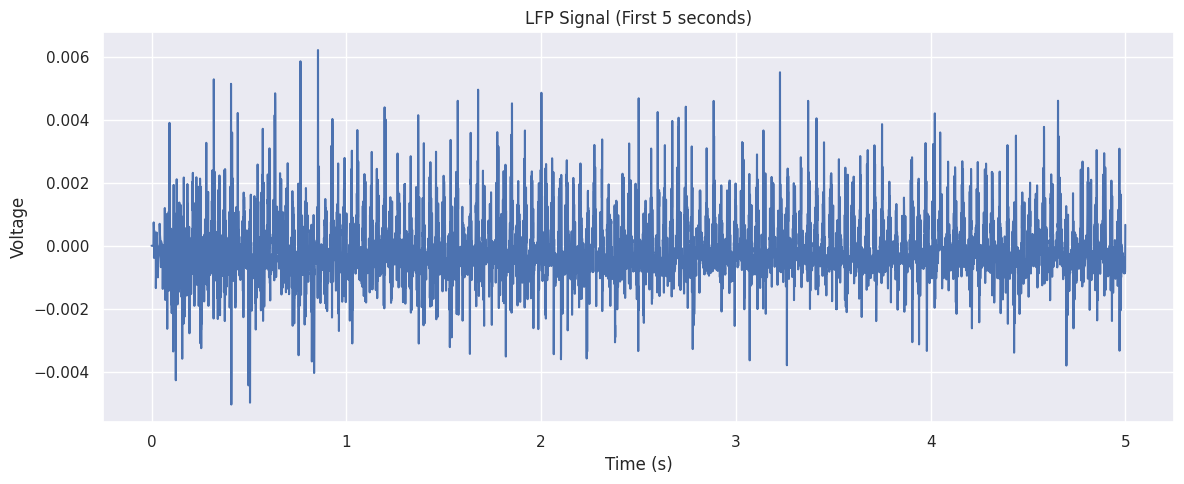

In [11]:
# Due to the large size, we'll just look at a subset of data (first 10,000 samples, ~5 seconds at 2000 Hz)
subset_size = 10000
subset_data = lfp_data.data[:subset_size]
time_array = np.arange(subset_size) / lfp_data.rate + lfp_data.starting_time

# Plot LFP signal for a subset of the data
plt.figure(figsize=(12, 5))
plt.plot(time_array, subset_data)
plt.xlabel('Time (s)')
plt.ylabel('Voltage')
plt.title('LFP Signal (First 5 seconds)')
plt.grid(True)
plt.tight_layout()
plt.show()

Now, let's compute and visualize the power spectral density of the LFP signal to see if there are prominent frequency components:

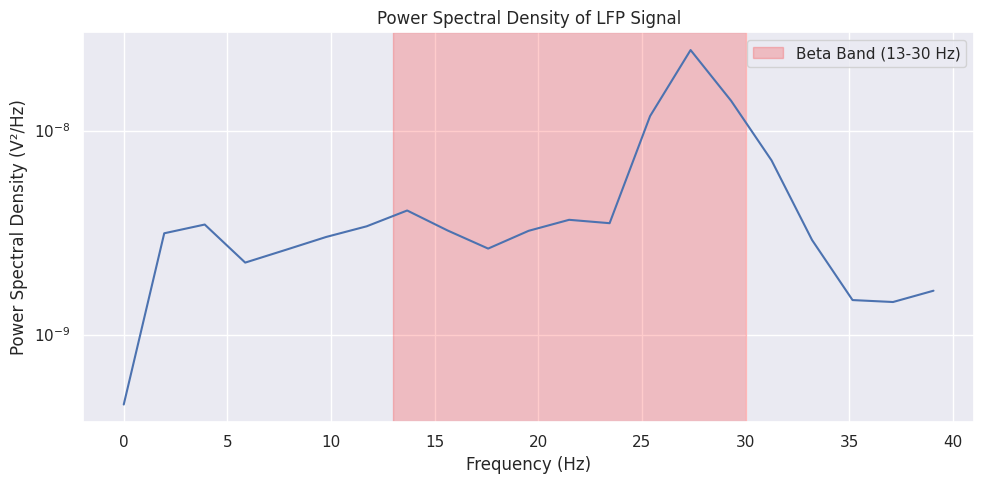

In [12]:
# Compute power spectral density for LFP data
f, Pxx = signal.welch(subset_data, lfp_data.rate, nperseg=1024)

# Focus on the 0-40 Hz range for better visualization
mask = f <= 40
f = f[mask]
Pxx = Pxx[mask]

plt.figure(figsize=(10, 5))
plt.semilogy(f, Pxx)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (V²/Hz)')
plt.title('Power Spectral Density of LFP Signal')
plt.axvspan(13, 30, alpha=0.2, color='red', label='Beta Band (13-30 Hz)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Let's also create a spectrogram to visualize how the frequency content changes over time:

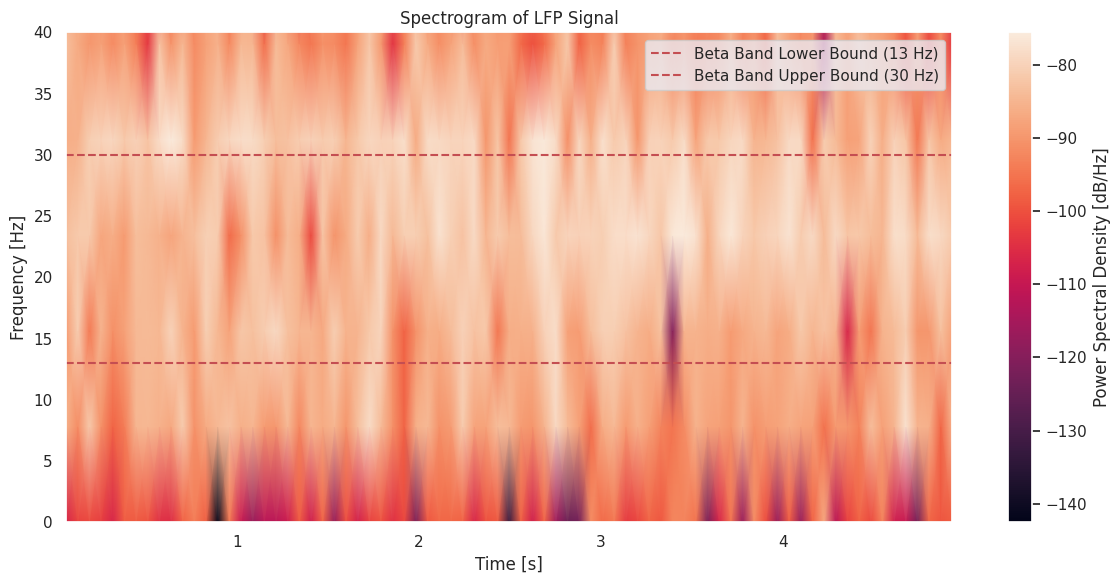

In [13]:
# Create a spectrogram to see how frequency content changes over time
plt.figure(figsize=(12, 6))
f, t, Sxx = signal.spectrogram(subset_data, lfp_data.rate, nperseg=256, noverlap=128)
plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.title('Spectrogram of LFP Signal')
plt.colorbar(label='Power Spectral Density [dB/Hz]')
plt.axhline(y=13, color='r', linestyle='--', label='Beta Band Lower Bound (13 Hz)')
plt.axhline(y=30, color='r', linestyle='--', label='Beta Band Upper Bound (30 Hz)')
plt.ylim(0, 40)  # Limit y-axis to 0-40 Hz for better visualization
plt.legend()
plt.tight_layout()
plt.show()

## Comparing Beta Band Activity Between File Types

Now that we've looked at both file types, let's directly compare the beta band activity (13-30 Hz) between them. This comparison is particularly relevant for Parkinson's Disease research, as beta oscillations are associated with PD symptoms.

Beta Band File - Beta Power: 1.545858e-13 V²
LFP File - Beta Power: 1.258767e-07 V²


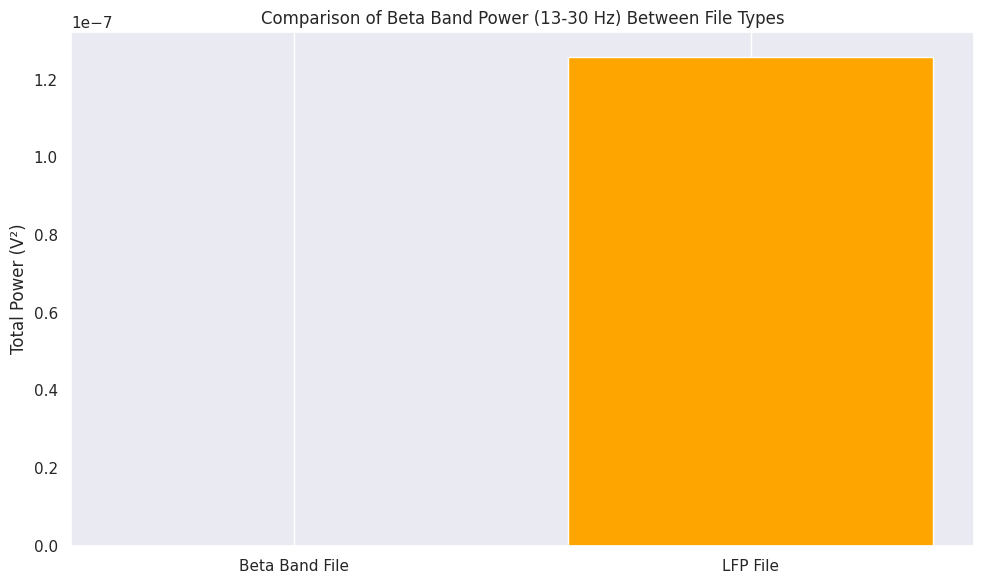

In [14]:
# Function to calculate beta band power (13-30 Hz)
def calculate_beta_power(data, fs):
    f, Pxx = signal.welch(data, fs, nperseg=min(1024, len(data)))
    # Extract beta frequency range (13-30 Hz)
    beta_mask = (f >= 13) & (f <= 30)
    beta_freqs = f[beta_mask]
    beta_power = Pxx[beta_mask]
    # Calculate total power in beta band using Simpson's rule for integration
    from scipy.integrate import simpson
    total_beta_power = simpson(beta_power, beta_freqs)
    return total_beta_power

# Calculate beta power for both file types
beta_power = calculate_beta_power(beta_data, fs)
lfp_power = calculate_beta_power(subset_data, lfp_data.rate)

print(f"Beta Band File - Beta Power: {beta_power:.6e} V²")
print(f"LFP File - Beta Power: {lfp_power:.6e} V²")

# Plot comparison
plt.figure(figsize=(10, 6))
plt.bar(['Beta Band File', 'LFP File'], [beta_power, lfp_power], color=['blue', 'orange'])
plt.title('Comparison of Beta Band Power (13-30 Hz) Between File Types')
plt.ylabel('Total Power (V²)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Comparing Frequency Spectra Between File Types

Let's also compare the power spectral densities of both file types side by side:

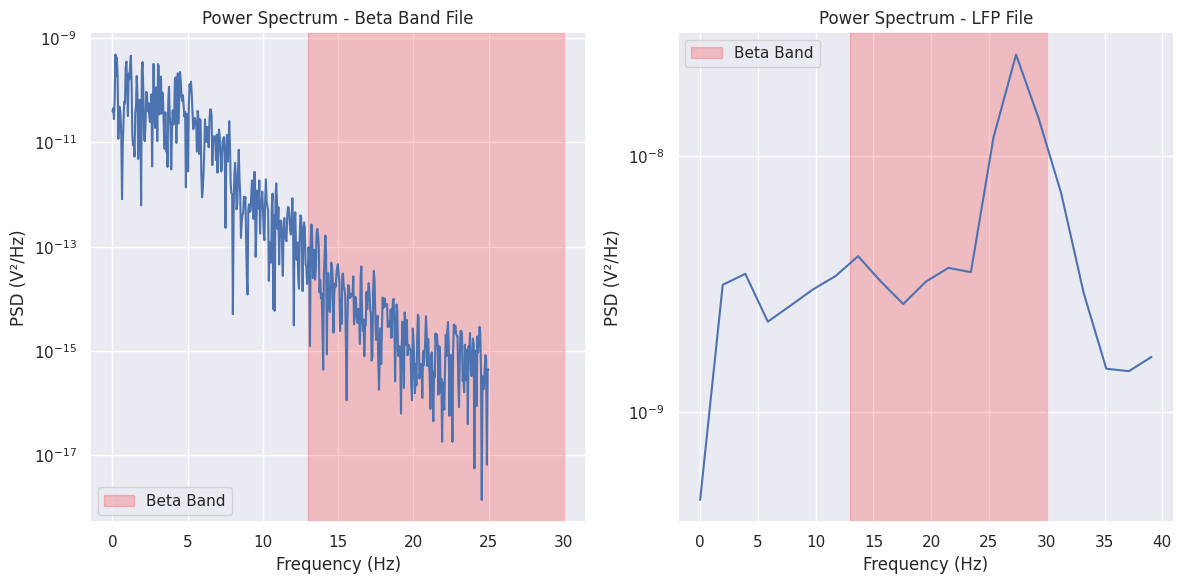

In [15]:
# Calculate PSD for beta file data
f_beta, Pxx_beta = signal.welch(beta_data, fs, nperseg=min(1024, len(beta_data)))
mask_beta = f_beta <= 40  # Limit to 0-40 Hz for better visualization

# Calculate PSD for LFP file data
f_lfp, Pxx_lfp = signal.welch(subset_data, lfp_data.rate, nperseg=min(1024, len(subset_data)))
mask_lfp = f_lfp <= 40  # Limit to 0-40 Hz for better visualization

# Create comparison plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.semilogy(f_beta[mask_beta], Pxx_beta[mask_beta])
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (V²/Hz)')
plt.title('Power Spectrum - Beta Band File')
plt.axvspan(13, 30, alpha=0.2, color='red', label='Beta Band')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.semilogy(f_lfp[mask_lfp], Pxx_lfp[mask_lfp])
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (V²/Hz)')
plt.title('Power Spectrum - LFP File')
plt.axvspan(13, 30, alpha=0.2, color='red', label='Beta Band')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

## Analysis of Beta Band Activity

The above analysis shows some interesting characteristics of the data:

1. The **Beta Band File** contains data that has been specifically filtered to highlight the beta band (13-30 Hz) activity, as evidenced by the file naming.

2. The **LFP File** contains raw Local Field Potential recordings with a much higher sampling rate (2000 Hz vs. ~50 Hz in the beta file) and includes broader frequency content.

3. The **Beta Power Comparison** shows that the LFP file actually contains more beta band power than the dedicated beta band file. This might be because:
   - The beta band file may have been preprocessed to isolate specific beta oscillations
   - The LFP file contains raw, unfiltered signals with naturally stronger power across all frequency bands
   - Different preprocessing techniques could have been applied to each file type

4. The **Spectrograms** reveal how the frequency content changes over time, which could be useful for analyzing dynamic changes in beta oscillations.

This dataset provides valuable resources for studying beta oscillations in simulated healthy subjects, which could serve as a control for comparison with parkinsonian samples in future research.

## Conclusion

In this notebook, we've explored the PESD dataset, which contains simulated electrophysiological signals relevant to Parkinson's Disease research. We've examined two main types of files: Beta Band Voltage files and Local Field Potential (LFP) files, and learned about their structure, content, and differences.

Key findings include:

1. The dataset contains simulated healthy subject data with both frequency-domain (beta band) and time-domain (LFP) signals.

2. Beta band oscillations (13-30 Hz) are particularly relevant for PD research and can be observed in both file types.

3. The LFP files contain raw signals with broader frequency content and higher sampling rate (2000 Hz).

4. The beta band files appear to be specifically processed to highlight beta band activity, though with lower power than the raw LFP signals.

Understanding the structure and content of this dataset is crucial for researchers interested in studying electrophysiological signals related to Parkinson's Disease. Future work could involve comparing these simulated healthy signals with real or simulated parkinsonian signals to identify characteristic differences and potential biomarkers for PD.